In [12]:
import numpy as np
import matplotlib.pyplot as plt

Models

In [13]:
def FTL(T,rew):
    regret = [0]
    loss = [0,0]
    loss_t = 0
    outcomes = [0,1]

    for t in range (1,T):
        action = np.argmin(loss)
        loss_t += abs(rew[t]- action)

        for i in range(2):
            l = abs(rew[t]- outcomes[i])
            loss[i] = loss[i] + l
        
        regret.append(loss_t - min(loss))
    
    return regret

In [14]:
def hedge(T,rew):
    regret = [0]
    loss = [0,0]
    loss_t = 0
    outcomes = [0,1]
    eta = np.sqrt(2*np.log(2)/T)
    probabilities = np.array([0,1])

    for t in range(1,T):
        for i in range(2):
            probabilities[i] = (np.exp(-eta*loss[i]))
        
        probabilities = probabilities/np.sum(probabilities)
        action = np.random.choice([0,1], p = probabilities)
        loss_t += abs(rew[t] - action)
        
        for i in range(2):
            l = abs(rew[t] - outcomes[i])
            loss[i] = loss[i] + l
       
        regret.append(loss_t - min(loss))
    
    return regret
        
    


In [15]:
def r_hedge(T,rew):
    regret = [0]
    loss = [0,0]
    loss_t = 0
    outcomes = [0,1]
    eta = np.sqrt(8*np.log(2)/T)
    probabilities = np.array([0,1])

    for t in range(1,T):
        for i in range(2):
            probabilities[i] = np.exp(-eta*loss[i])
        
        probabilities = probabilities/np.sum(probabilities)
        action = np.random.choice([0,1], p = probabilities)
        loss_t += abs(rew[t] - action)
        
        for i in range(2):
            l = abs(rew[t] - outcomes[i])
            loss[i] = loss[i] + l
        regret.append(loss_t - min(loss))
    return regret
        
    


In [16]:
def a_hedge(T,rew):
    regret = [0]
    loss = [0,0]
    loss_t = 0
    outcomes = [0,1]
    probabilities = np.array([0,1])

    for t in range(1,T):
        eta = np.sqrt(np.log(2)/t)
        for i in range(2):
            probabilities[i] = np.exp(-eta*loss[i])
        
        probabilities = probabilities/np.sum(probabilities)
        action = np.random.choice([0,1], p = probabilities)
        loss_t += abs(rew[t] - action)
        
        for i in range(2):
            l = abs(rew[t] - outcomes[i])
            loss[i] = loss[i] + l
        regret.append(loss_t - min(loss))
    return regret
        
    


In [17]:
def a_r_hedge(T,rew):
    regret = [0]
    loss = [0,0]
    loss_t = 0
    outcomes = [0,1]
    probabilities = np.array([0,1])

    for t in range(1,T):
        eta = 2*(np.sqrt(np.log(2)/t))
        for i in range(2):
            probabilities[i] = np.exp(-eta*loss[i])
        
        probabilities = probabilities/np.sum(probabilities)
        action = np.random.choice([0,1], p = probabilities)
        loss_t += abs(rew[t] - action)
        
        for i in range(2):
            l = abs(rew[t] - outcomes[i])
            loss[i] = loss[i] + l
        regret.append(loss_t - min(loss))
    return regret
        
    


In [18]:
def generate_rew(delta, T):    
    return np.random.binomial(n=1, size=T, p=0.5 - delta)

Simulate algorithm

In [19]:
def simulations(algorithm, T, delta):
    regrets = []
    for i in range(10):
        reward = generate_rew(delta, T)
        a_regret = algorithm(T, reward)
        regrets.append(a_regret)
    means = np.mean(regrets, axis=0)
    stds = np.std(regrets, axis=0)
    return means, stds

In [20]:
# constants
T = 2000
delta = [0.25, 0.125, 0.0625]
x_values = np.arange(0, T)
legend= ['FTL','Hedge', 'Hedge Anytime','Hedge Reparamertized','Hedge Anytime Reparamertized']

In [21]:
# pipeline
tot_means = []
tot_stds = []
algs = [FTL, hedge, r_hedge, a_hedge, a_r_hedge]

for u in delta:
    u_means = []
    u_stds = []
    for alg in algs:
        means, stds = simulations(alg, T, u)
        u_means.append(means)
        u_stds.append(stds)
    tot_means.append(u_means)
    tot_stds.append(u_stds)

In [22]:
def plot(x_values, y_values_list, y_values_std_list, legend_labels=None, x_label=None, y_label=None, title=None,figsize=(12, 10)):

    fig, ax = plt.subplots(figsize=figsize)

    # Plot each curve
    for i, y_values in enumerate(y_values_list):
        if legend_labels:
            ax.plot(x_values, y_values, label=legend_labels[i])
        else:
            ax.plot(x_values, y_values)
    # Plot one std for each curve
    for mean, std in zip(y_values_list, y_values_std_list):
        ax.fill_between(x_values, mean + std, mean - std, alpha=0.1)
        
    # Add axis labels and title
    if x_label:
        ax.set_xlabel(x_label)
    if y_label:
        ax.set_ylabel(y_label)
    if title:
        ax.set_title(title)

    # Add a legend if labels are provided
    if legend_labels:
        ax.legend()
    
    # Remove white space
    ax.set_xlim([0, len(x_values)])
    # Display the graph
    plt.show()

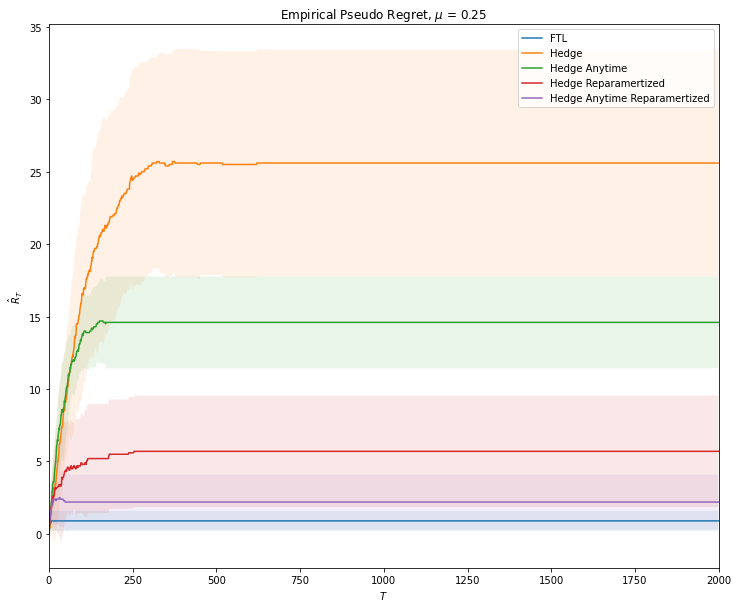

In [23]:
plot(x_values, tot_means[0], tot_stds[0], legend_labels=legend, x_label=r"$T$", y_label=r"$\hat{R}_{T}$", title=fr"Empirical Pseudo Regret, $\mu$ = {delta[0]}")

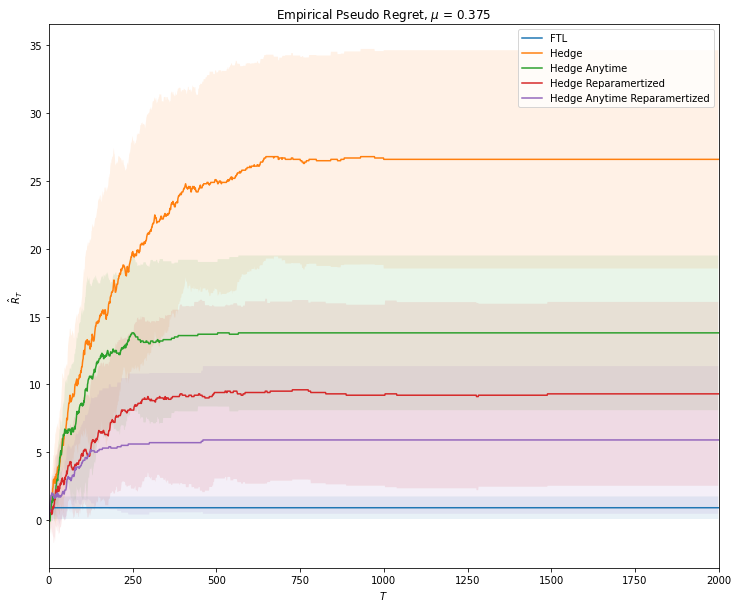

In [24]:
plot(x_values, tot_means[1], tot_stds[1], legend_labels=legend, x_label=r"$T$", y_label=r"$\hat{R}_{T}$", title=fr"Empirical Pseudo Regret, $\mu$ = 0.375")

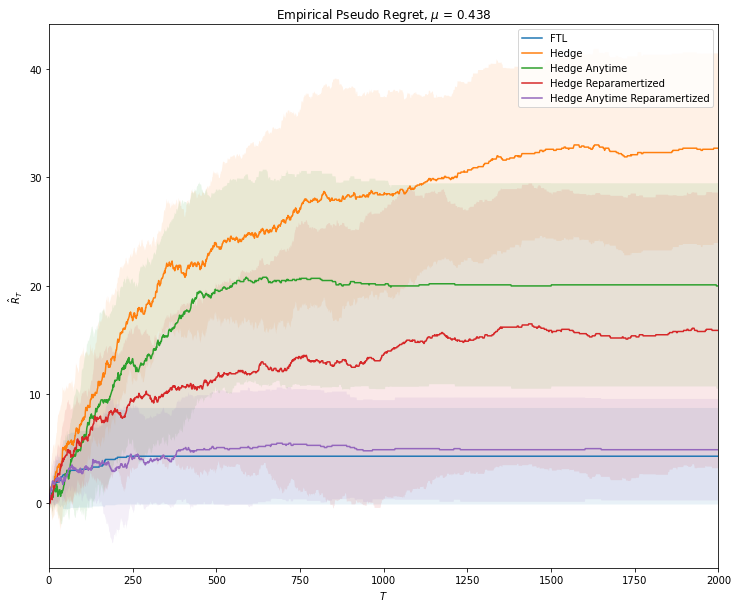

In [25]:
plot(x_values, tot_means[2], tot_stds[2], legend_labels=legend, x_label=r"$T$", y_label=r"$\hat{R}_{T}$", title=fr"Empirical Pseudo Regret, $\mu$ = 0.438")

adversarial iid

In [33]:
def FTL(T):
    regret = [0]
    loss = [0,0]
    loss_t = 0
    outcomes = [0,1]
    old_action = 0

    for t in range (1,T):
        action = np.argmin(loss)
        prob = 0.5-0.3*old_action
        rew = np.random.binomial(n=1,p=prob, size=1)
        old_action = action
        loss_t += abs(rew[0] - action)

        for i in range(2):
            l = abs(rew[0]- outcomes[i])
            loss[i] = loss[i] + l
        
        regret.append(loss_t - min(loss))
    
    return regret

In [34]:
def hedge(T):
    regret = [0]
    loss = [0,0]
    loss_t = 0
    outcomes = [0,1]
    eta = np.sqrt(2*np.log(2)/T)
    probabilities = np.array([0,1])
    old_action = 0

    for t in range(1,T):
        for i in range(2):
            probabilities[i] = (np.exp(-eta*loss[i]))
        
        probabilities = probabilities/np.sum(probabilities)
        action = np.random.choice([0,1], p = probabilities)
        prob = 0.5-0.3*old_action
        rew = np.random.binomial(n=1,p=prob, size=1)
        old_action = action
        loss_t += abs(rew[0] - action)
        
        for i in range(2):
            l = abs(rew[0] - outcomes[i])
            loss[i] = loss[i] + l
       
        regret.append(loss_t - min(loss))
    
    return regret
        
    


In [35]:
def r_hedge(T):
    regret = [0]
    loss = [0,0]
    loss_t = 0
    outcomes = [0,1]
    eta = np.sqrt(8*np.log(2)/T)
    probabilities = np.array([0,1])
    old_action = 0

    for t in range(1,T):
        for i in range(2):
            probabilities[i] = np.exp(-eta*loss[i])
        
        probabilities = probabilities/np.sum(probabilities)
        action = np.random.choice([0,1], p = probabilities)
        prob = 0.5-0.3*old_action
        rew = np.random.binomial(n=1,p=prob, size=1)
        old_action = action
        loss_t += abs(rew[0] - action)
        
        for i in range(2):
            l = abs(rew[0] - outcomes[i])
            loss[i] = loss[i] + l
        regret.append(loss_t - min(loss))
    return regret
        
    


In [36]:
def a_hedge(T):
    regret = [0]
    loss = [0,0]
    loss_t = 0
    outcomes = [0,1]
    probabilities = np.array([0,1])
    old_action = 0

    for t in range(1,T):
        eta = np.sqrt(np.log(2)/t)
        for i in range(2):
            probabilities[i] = np.exp(-eta*loss[i])
        
        probabilities = probabilities/np.sum(probabilities)
        action = np.random.choice([0,1], p = probabilities)
        prob = 0.5-0.3*old_action
        rew = np.random.binomial(n=1,p=prob, size=1)
        old_action = action
        loss_t += abs(rew[0] - action)
        
        for i in range(2):
            l = abs(rew[0] - outcomes[i])
            loss[i] = loss[i] + l
        regret.append(loss_t - min(loss))
    return regret
        
    


In [37]:
def a_r_hedge(T):
    regret = [0]
    loss = [0,0]
    loss_t = 0
    outcomes = [0,1]
    probabilities = np.array([0,1])
    old_action = 0

    for t in range(1,T):
        eta = 2*(np.sqrt(np.log(2)/t))
        for i in range(2):
            probabilities[i] = np.exp(-eta*loss[i])
        
        probabilities = probabilities/np.sum(probabilities)
        action = np.random.choice([0,1], p = probabilities)
        prob = 0.5-0.3*old_action
        rew = np.random.binomial(n=1,p=prob, size=1)
        old_action = action
        loss_t += abs(rew[0] - action)
        
        for i in range(2):
            l = abs(rew[0] - outcomes[i])
            loss[i] = loss[i] + l
        regret.append(loss_t - min(loss))
    return regret
        
    


In [38]:
def simulations_vs_FTL(algorithm, T):
    regrets = []
    for i in range(10):
        a_regret = algorithm(T)
        regrets.append(a_regret)
    means = np.mean(regrets, axis=0)
    stds = np.std(regrets, axis=0)
    return means, stds

In [43]:
# pipeline
tot_means = []
tot_stds = []
algs = [FTL, hedge, r_hedge, a_hedge, a_r_hedge]

for u in delta:
    u_means = []
    u_stds = []
    for alg in algs:
        means, stds = simulations_vs_FTL(alg, T)
        u_means.append(means)
        u_stds.append(stds)
    tot_means.append(u_means)
    tot_stds.append(u_stds)

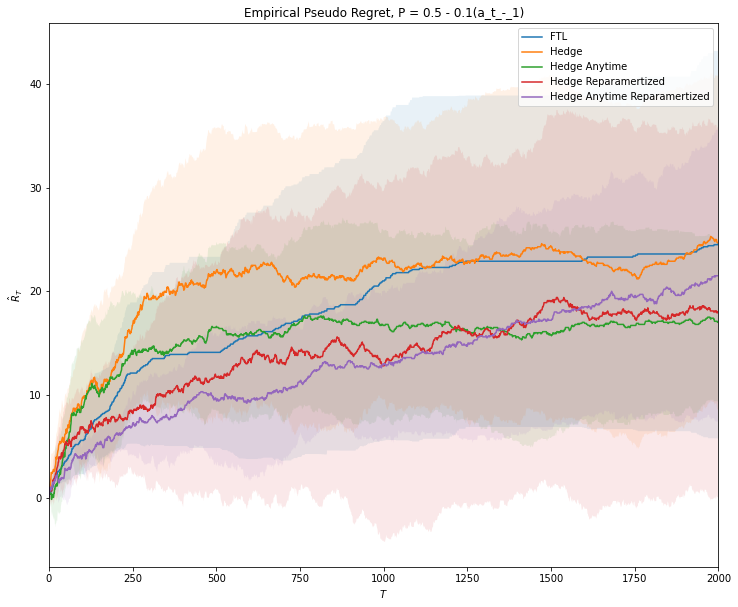

In [44]:
plot(x_values, tot_means[0], tot_stds[0], legend_labels=legend, x_label=r"$T$", y_label=r"$\hat{R}_{T}$", title=fr"Empirical Pseudo Regret, P = 0.5 - 0.1(a_t_-_1)")

In [2]:
import numpy as np

In [3]:
def create_arms(num_arms: int, best_mean: float, subopt_mean: float):
    opt_mean = best_mean  # set the first arm to have a prob of success = 0.5
    arms = [best_mean - subopt_mean for _ in range(num_arms)]
    arms[0] = opt_mean
    return arms


def create_rewards(arms: list, num_rounds: int):
    return np.array([np.random.binomial(n=1, size=num_rounds, p=arm) for arm in arms])


def plot_curves(x_values, y_values_list, y_values_std_list, legend_labels=None, x_label=None, y_label=None, title=None):
    # set up the figure and axis
    fig, ax = plt.subplots()

    # plot each curve
    for i, y_values in enumerate(y_values_list):
        if legend_labels:
            ax.plot(x_values, y_values, label=legend_labels[i])
        else:
            ax.plot(x_values, y_values)
    # plot one std for each curve
    for mean, std in zip(y_values_list, y_values_std_list):
        ax.fill_between(x_values, mean + std, mean - std, alpha=0.1)

    # add axis labels and title
    if x_label:
        ax.set_xlabel(x_label)
    if y_label:
        ax.set_ylabel(y_label)
    if title:
        ax.set_title(title)

    # add a legend if labels are provided
    if legend_labels:
        ax.legend()

    # remove white space
    ax.set_xlim([0, len(x_values)])
    # display the graph
    plt.show()
    fig.savefig(f"{title}.png")


def simulate(algorithm, num_rounds: int, num_arms, best_mean, subopt_mean):
    pseudo_regrets = []
    arms = create_arms(num_arms, best_mean, subopt_mean)
    for _ in range(20):
        rewards = create_rewards(arms, num_rounds)
        alg_pseudo_regret = algorithm(num_rounds, arms, rewards)
        pseudo_regrets.append(alg_pseudo_regret)
    means = np.mean(pseudo_regrets, axis=0)
    stds = np.std(pseudo_regrets, axis=0)
    return means, stds


def ucb(num_rounds: int, arms: list, rewards: list[np.ndarray]) -> list:
    num_arms = len(arms)
    times_played = np.zeros(num_arms)
    arm_rewards = np.zeros(num_arms)
    ucbs = np.zeros(num_arms)
    pseudo_regrets = []

    # initialization for first k rounds
    for i in range(num_arms):
        arm_rewards[i] += rewards[i][i]
        ucbs[i] += rewards[i][i]
        times_played[i] += 1
        pseudo_regret = max(arms) - arms[i]
        pseudo_regrets.append(pseudo_regret)

    for turn in range(num_arms, num_rounds):
        # calculate the mean reward and ucb of each arm
        for arm in range(num_arms):
            mean = arm_rewards[arm] / times_played[arm]
            ucbs[arm] += mean + np.sqrt((np.log(turn) / times_played[arm]))
        # choose an arm
        action = np.argmax(ucbs)
        # update reward and number of times played
        arm_rewards[action] += rewards[action][turn]
        times_played[action] += 1
        # compute the pseudo-regret
        pseudo_regret = max(arms) - arms[action]
        pseudo_regrets.append(pseudo_regret)
    return np.cumsum(pseudo_regrets)

In [6]:
dio = create_arms(4,0.5,0.2)
dio

[0.5, 0.3, 0.3, 0.3]

In [8]:
cane = create_rewards(dio,10)
cane

array([[1, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [9]:
ucb(10,dio,cane)

array([0. , 0.2, 0.4, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6])